#Introdução


> **Análise dos Dados do Airbnb - Rio de Janeiro**

> O **Airbnb** já é considerado como sendo a maior empresa hoteleira da atualidade. 

> Conectando pessoas que querem viajar e se hospedar com anfitriões que querem alugar seus imóveis de maneira prática, o **Airbnb** fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

> No final de 2018, a Startup fundada 10 anos atrás, já havia hospedado mais de 300 milhões de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

> Uma das iniciativas do **Airbnb** é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal **Inside Airbnb**, é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de **Data Science.**



> Todos os dados usados aqui foram obtidos a partir do site Inside Airbnb.
> Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

> listings.csv - Summary information and metrics for listings in Rio de Janeiro (good for visualisations).



# Dicionário de Variavéis;


 
 * id - Número de ID gerado para indentificar o ímovel;
 * name - Nome da Propriedade Anunciada;
 * host_id - Número ID do Proprietário;
 * neighbourhood_group - Essa coluna não contém dados válidos;
 * neighbourhood - Nome do Bairro;
 * latitude - Cordenada de Latitute da Propriedade;
 * longitude - Cordenado de Longitude da Propriedade;
 * room_type - Tipo de Quarto Oferecido;
 * price - Preço;
 * minimum_nights - Quantidade Mínima de Noites para Reservar;
 * number_of_reviews - Número de Reviews que a propriedade Possui;
 * last_review - Data do último Review;
 * reviews_per_month - Quantidade de Reviwes por Mês;
 * calculated_host_listings_count - Quantidade de Imóveis do mesmo    anfitrião;
 * availability_365 - Número de Disponibilidade dentro de 365 dias;
 * license - Essa coluna não contém dados válidos;


# Obtenção de Dados

In [ ]:
# Importação de Libs;

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# Importando Base;

# Link: http://insideairbnb.com/get-the-data.html

df = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2021-07-17/visualisations/listings.csv")


In [ ]:
# Exibindo Registros Iniciais;

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96599,-43.17940,Entire home/apt,170,5,265,2021-05-21,2.11,1,317,14,NaN
1,24480,Nice and cozy near Ipanema Beach,99249,Goya,NaN,Ipanema,-22.98405,-43.20189,Entire home/apt,283,3,85,2017-04-22,0.88,1,154,0,NaN
2,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97735,-43.19105,Entire home/apt,160,7,238,2019-04-27,1.89,2,316,0,NaN
3,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98839,-43.19232,Entire home/apt,256,2,181,2019-12-06,1.97,1,167,0,NaN
4,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98107,-43.19136,Entire home/apt,120,3,363,2019-06-15,3.05,1,92,31,NaN


# Análise dos Dados

**Q.1 - Quantidade de Atributos (Variavéis) e Quantidade de Entradas e Tipos de Dados**

In [ ]:
#Indentificação de Volume de Dados do DataFrame;

print("Variavéis:\t {}".format(df.shape[0]))
print("Entradas:\t {}".format(df.shape[1]))

Variavéis:	 23635
Entradas:	 18


In [ ]:
# Indentificação dos Primeiros Registros;

display(df.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

**Q.2 - Percentual de Valores Ausentes no Dataframe**

In [ ]:
# Ordenando em Ordem Descrescente as Váriaveis  por seus Valores Ausentes;

(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

license                           1.000000
neighbourhood_group               1.000000
reviews_per_month                 0.366194
last_review                       0.366194
name                              0.000889
host_name                         0.000296
longitude                         0.000000
host_id                           0.000000
neighbourhood                     0.000000
latitude                          0.000000
room_type                         0.000000
number_of_reviews_ltm             0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
id                                0.000000
dtype: float64

**Q.3 - Qual o tipo de distribuição das Variavéis?**

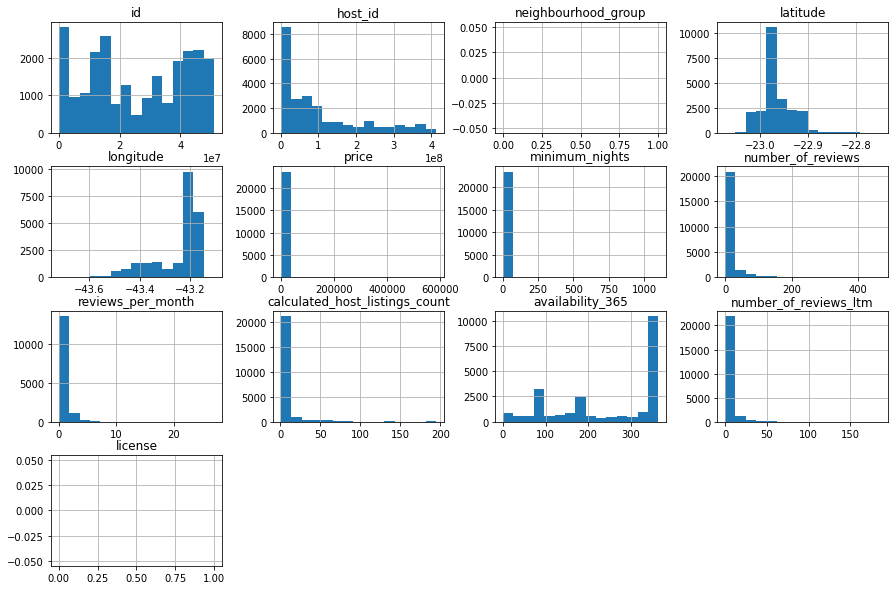

In [ ]:
df.hist(bins = 15, figsize=(15,10));

**Q.4 Há outliers presentes?**

> Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de outliers. São elas:

* Resumo estatístico por meio do método describe()
* Plotar boxplots para a variável.

In [ ]:
# Resumo Estatístico das Variáveis; 

#Selecionando apenas as colunas necessárias;

df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,23635.000000,23635.000000,23635.000000,14980.000000,23635.000000,23635.000000
mean,751.329300,4.919018,13.207489,0.602536,7.396361,246.030379
std,5477.207312,20.702676,31.962546,0.864291,22.759622,123.474424
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,150.000000,1.000000,0.000000,0.090000,1.000000,130.000000
50%,256.000000,2.000000,2.000000,0.240000,1.000000,297.000000
75%,511.000000,4.000000,10.000000,0.790000,3.000000,364.000000
max,586229.000000,1100.000000,466.000000,26.960000,195.000000,365.000000


> Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável price possui 75% do valor abaixo de 599, porém seu valor máximo é 40000.
* A quantidade mínima de noites (minimum_nights) está acima do limite real de 365 dias no ano.



**Boxplot para minimum_nights¶**


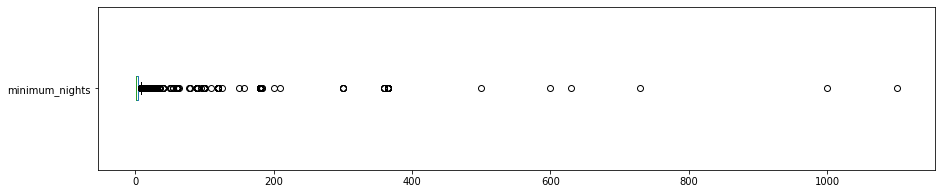

minimum_nights: valores acima de 30:
202 entradas
0.8547%


In [ ]:
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

#Quantidade de valores acima de 30 dias para minimum_nights;

print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))


**Boxplot para price**


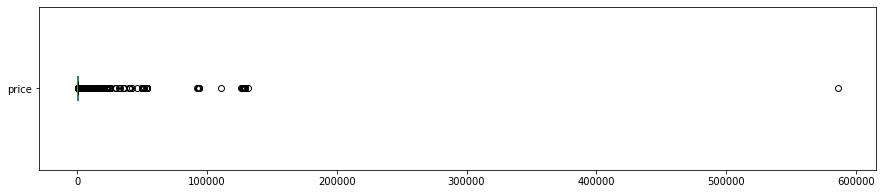


price: valores acima de 1500
1563 entradas
6.6131%


In [ ]:
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# Quantidade de valores acima de 1500 para price;

print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

**Histogramas sem outliers¶**


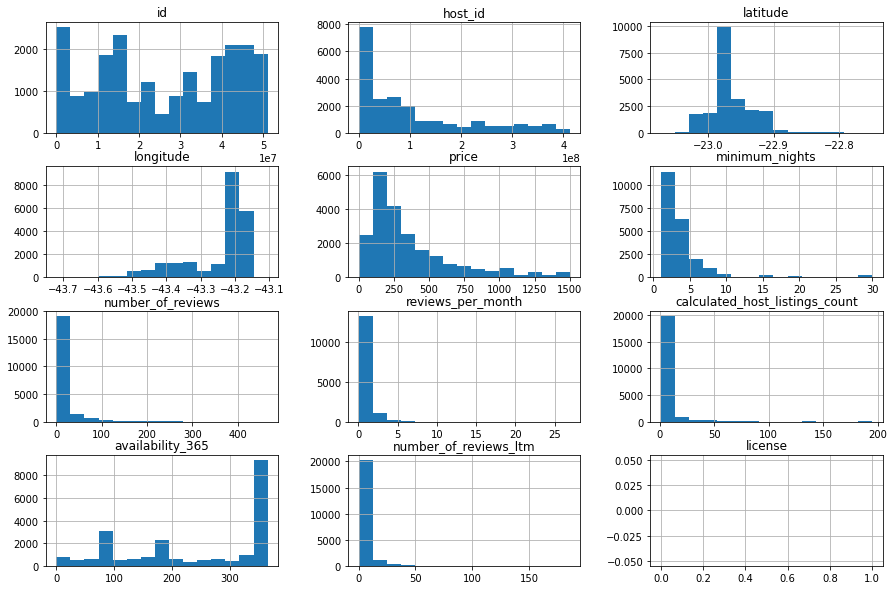

In [ ]:
# Removendo os *outliers* e salando em um novo DataFrame;

df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# Removendo `neighbourhood_group`, cujo está vazio;

df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# Plotar  histograma para as variáveis numéricas;
df_clean.hist(bins=15, figsize=(15,10));

**Q.4 Qual a correlação existente entre as variáveis**



> Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

> Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, precisamos:

* Criar uma matriz de correlação;
* Gerar um heatmap a partir dessa matriz, usando a biblioteca seaborn;

In [ ]:
# Matriz de Correlação;

corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.133954,-0.160485,-0.158233,0.079018,0.129440
minimum_nights,0.133954,1.000000,-0.068339,-0.094496,-0.049724,0.011511
number_of_reviews,-0.160485,-0.068339,1.000000,0.637832,-0.052175,-0.139900
reviews_per_month,-0.158233,-0.094496,0.637832,1.000000,-0.001266,-0.190763
calculated_host_listings_count,0.079018,-0.049724,-0.052175,-0.001266,1.000000,0.016037
availability_365,0.129440,0.011511,-0.139900,-0.190763,0.016037,1.000000


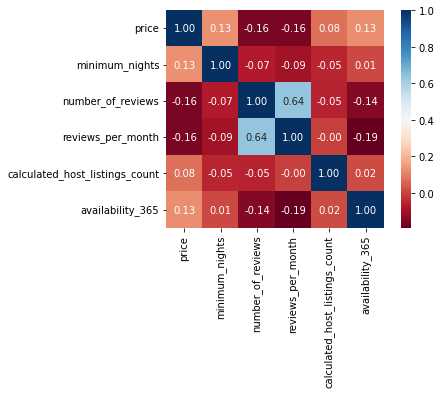

In [ ]:
# Mapa de Calor da Correlação;

sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);


**Q.5 Qual o tipo de imóvel mais alugado no Airbnb?¶**


> Quantidade de ocorrências de cada tipo de aluguel, usando o método value_counts().italicized text

In [ ]:
# Quantidade de cada tipo de imóvel disponível;

df_clean.room_type.value_counts()

Entire home/apt    15593
Private room        5697
Shared room          516
Hotel room            83
Name: room_type, dtype: int64

In [ ]:
# Percentual de cada tipo de ímovel;

df_clean.room_type.value_counts() / df_clean.shape[0]


Entire home/apt    0.712367
Private room       0.260268
Shared room        0.023573
Hotel room         0.003792
Name: room_type, dtype: float64

**Q.6 Qual a localidade mais cara do Rio?**

In [ ]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]


neighbourhood
Caju                  1208.000000
Anchieta               800.000000
Vaz Lobo               789.500000
Realengo               711.500000
Pavuna                 590.666667
Sepetiba               556.500000
Rocha Miranda          551.000000
Joá                    524.864865
Complexo do Alemão     520.000000
Lagoa                  507.689840
Name: price, dtype: float64

In [ ]:
# Quantidade de imóveis no Complexo do Alemão;
print(df[df.neighbourhood == "Complexo do Alemão"].shape)

# Entradas do Complexo do Alemão;
df[df.neighbourhood == "Complexo do Alemão"]

(2, 18)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
9612,17148972,Casa Brota,101966262,Thamyra,NaN,Complexo do Alemão,-22.85833,-43.27465,Private room,140,1,6,2018-10-07,0.11,1,90,0,NaN
10669,21448656,Casa 1 quarto alem,155642978,Felipe,NaN,Complexo do Alemão,-22.85998,-43.27476,Shared room,900,1,1,2017-11-28,0.02,1,365,0,NaN


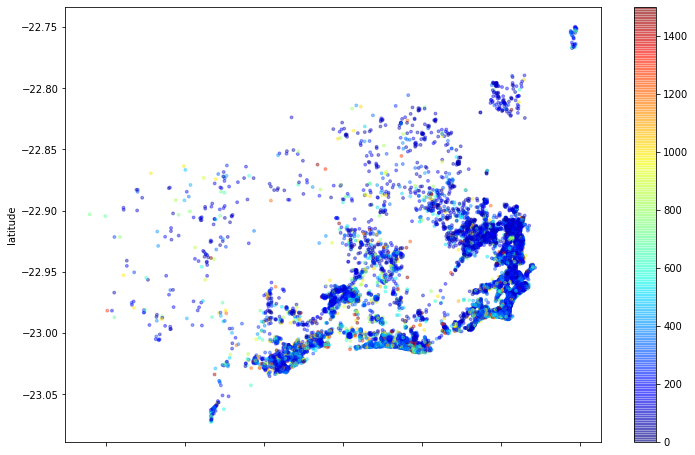

In [ ]:
# Plotar os imóveis pela latitude-longitude;

df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

# **Conclusões** 


> Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem outliers em algumas das variáveis.

>Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

